#**Instalando as bibliotecas e adquirindo os dados**



In [ ]:
pip install kaggle

**Criando um diretório raiz para armazenar a API Key do kaggle e posteriormente mover o arquivo upload para lá**


In [ ]:
import os

# Criar a pasta .kaggle no diretório raiz
os.makedirs("/root/.kaggle/", exist_ok=True)


In [ ]:
import shutil

# Mover o arquivo `kaggle.json` para a pasta `.kaggle`
shutil.move("kaggle (1).json", "/root/.kaggle/")


FileNotFoundError: [Errno 2] No such file or directory: 'kaggle (1).json'

Permissionando para fazer downloads de datasets diretamente

In [ ]:
!chmod 600 /root/.kaggle/kaggle (1).json


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 /root/.kaggle/kaggle (1).json'


Fazendo os downloads


In [ ]:
!kaggle datasets download -d netflix-inc/netflix-prize-data --unzip


Dataset URL: https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data
License(s): other
100% 682M/683M [00:09<00:00, 79.8MB/s]
100% 683M/683M [00:09<00:00, 76.5MB/s]


#**Iniciando a EDA, tratamento, treino e testes iniciais**


**EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Caminho para o arquivo movie_titles.csv
movie_titles_path = 'movie_titles.csv'

# Carregando os títulos dos filmes
movie_titles = pd.read_csv(movie_titles_path, encoding='latin1', header=None, names=['MovieID', 'Year', 'Title'],on_bad_lines='skip')
movie_titles.head()



,MovieID,Year,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [ ]:
# Caminho para o arquivo combined_data_1.txt
combined_data_path = 'combined_data_1.txt'

# Criando listas vazias para armazenar os dados
data = {'MovieID': [], 'CustomerID': [], 'Rating': [], 'Date': []}

# Lendo o arquivo linha por linha
with open(combined_data_path, 'r') as f:
    movie_id = None
    for i, line in enumerate(f):
        line = line.strip()
        if line.endswith(':'):
            # Linha com MovieID
            movie_id = int(line.replace(':', ''))
        else:
            # Linha com avaliação: CustomerID,Rating,Date
            customer_id, rating, date = line.split(',')
            data['MovieID'].append(movie_id)
            data['CustomerID'].append(int(customer_id))
            data['Rating'].append(int(rating))
            data['Date'].append(date)

        # Para fins de exemplo, vamos limitar a 1 milhão de linhas
        if i > 1_000_000:
            break

# Convertendo para DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,MovieID,CustomerID,Rating,Date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [ ]:
# Mesclando df_ratings com movie_titles
df_merged = df.merge(movie_titles, on='MovieID', how='left')
df_merged.head()


,MovieID,CustomerID,Rating,Date,Year,Title
0,1,1488844,3,2005-09-06,2003.0,Dinosaur Planet
1,1,822109,5,2005-05-13,2003.0,Dinosaur Planet
2,1,885013,4,2005-10-19,2003.0,Dinosaur Planet
3,1,30878,4,2005-12-26,2003.0,Dinosaur Planet
4,1,823519,3,2004-05-03,2003.0,Dinosaur Planet


In [ ]:
# Informações gerais sobre o dataframe
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999777 entries, 0 to 999776
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   MovieID     999777 non-null  int64         
 1   CustomerID  999777 non-null  int64         
 2   Rating      999777 non-null  int64         
 3   Date        999777 non-null  datetime64[ns]
 4   Year        999598 non-null  float64       
 5   Title       999598 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 45.8+ MB


In [ ]:
# Estatísticas descritivas
df_merged.describe()


,MovieID,CustomerID,Rating,Date,Year
count,999777.00000,9.997770e+05,999777.000000,999777,999598.000000
mean,126.82276,1.322789e+06,3.624416,2004-10-06 07:41:38.413546624,1996.579874
min,1.00000,6.000000e+00,1.000000,1999-12-09 00:00:00,1927.000000
25%,52.00000,6.608210e+05,3.000000,2004-05-16 00:00:00,1992.000000
50%,148.00000,1.319241e+06,4.000000,2004-12-17 00:00:00,2002.000000
75%,191.00000,1.985310e+06,4.000000,2005-06-15 00:00:00,2003.000000
max,225.00000,2.649429e+06,5.000000,2005-12-31 00:00:00,2005.000000
std,69.20159,7.647260e+05,1.074986,NaN,10.570889


In [ ]:
# Verificando valores nulos
df_merged.isnull().sum()


,0
MovieID,0
CustomerID,0
Rating,0
Date,0
Year,179
Title,179


<ipython-input-29-ea90a0bad3d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df_merged, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 

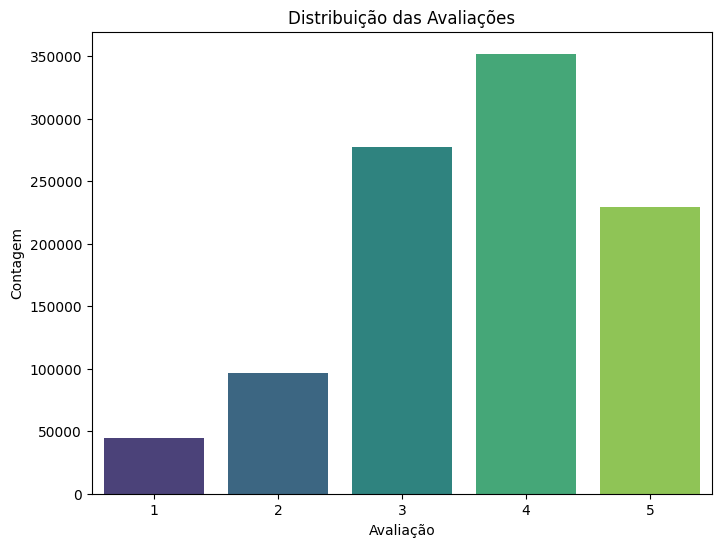

In [ ]:
# Plotando a distribuição das avaliações
plt.figure(figsize=(8,6))
sns.countplot(x='Rating', data=df_merged, palette='viridis')
plt.title('Distribuição das Avaliações')
plt.xlabel('Avaliação')
plt.ylabel('Contagem')
plt.show()


In [ ]:
# Calculando o número de avaliações por filme
ratings_per_movie = df_merged.groupby('MovieID')['Rating'].count().reset_index()
ratings_per_movie.rename(columns={'Rating': 'NumRatings'}, inplace=True)

# Mesclando com os títulos dos filmes
ratings_per_movie = ratings_per_movie.merge(movie_titles, on='MovieID', how='left')

# Filmes com mais avaliações
top_movies = ratings_per_movie.sort_values(by='NumRatings', ascending=False).head(10)
top_movies


,MovieID,NumRatings,Year,Title
29,30,118413,2003.0,Something's Gotta Give
190,191,98720,2003.0,X2: X-Men United
174,175,90450,1992.0,Reservoir Dogs
196,197,81260,2004.0,Taking Lives
27,28,39752,2002.0,Lilo and Stitch
142,143,38362,1997.0,The Game
198,199,35509,1978.0,The Deer Hunter
110,111,30127,2003.0,Duplex (Widescreen)
222,223,24125,2003.0,Chappelle's Show: Season 1
147,148,22194,2001.0,Sweet November


<ipython-input-31-d65173fb7896>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='NumRatings', data=top_movies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

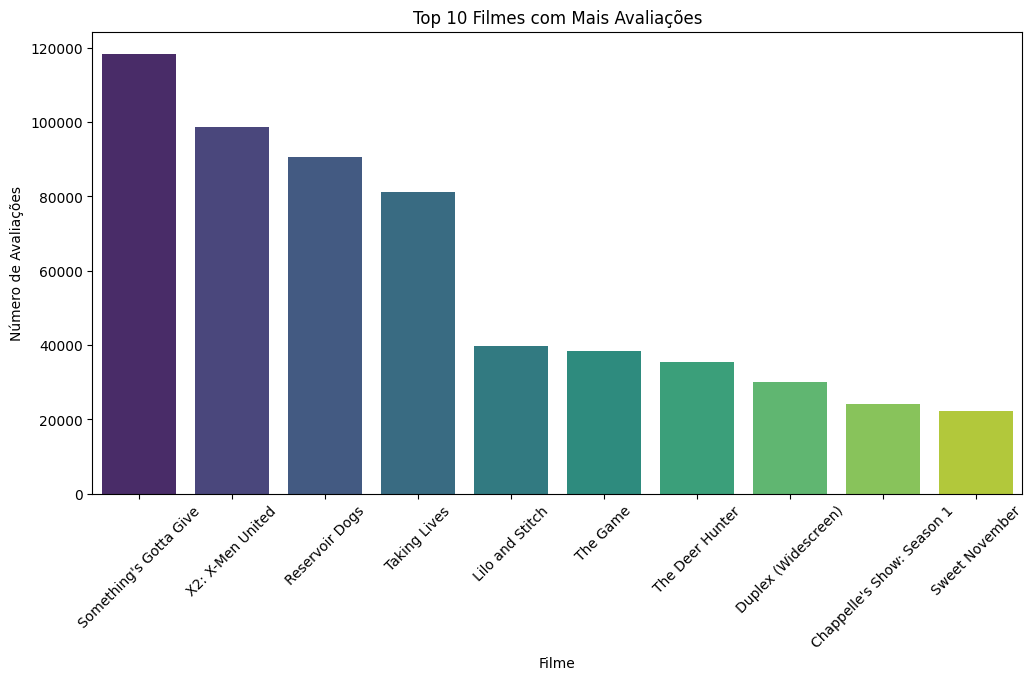

In [ ]:
# Plotando os filmes com mais avaliações
plt.figure(figsize=(12,6))
sns.barplot(x='Title', y='NumRatings', data=top_movies, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Filmes com Mais Avaliações')
plt.xlabel('Filme')
plt.ylabel('Número de Avaliações')
plt.show()


In [ ]:
# Calculando a avaliação média por filme
average_ratings = df_merged.groupby('MovieID')['Rating'].mean().reset_index()
average_ratings.rename(columns={'Rating': 'AverageRating'}, inplace=True)

# Combinando com o número de avaliações
movie_stats = ratings_per_movie.merge(average_ratings, on='MovieID')

# Aplicando um filtro para considerar filmes com um número mínimo de avaliações (ex: 1000)
popular_movies = movie_stats[movie_stats['NumRatings'] >= 1000]

# Filmes com as melhores avaliações
top_rated_movies = popular_movies.sort_values(by='AverageRating', ascending=False).head(10)
top_rated_movies[['Title', 'AverageRating', 'NumRatings']]


,Title,AverageRating,NumRatings
222,Chappelle's Show: Season 1,4.211192,24125
32,Aqua Teen Hunger Force: Vol. 1,4.168650,6890
208,Star Trek: Deep Space Nine: Season 5,4.160759,4373
67,Invader Zim,4.142599,2216
166,The Chorus,4.092230,9151
75,I Love Lucy: Season 2,4.090386,2954
31,ABC Primetime: Mel Gibson's The Passion of the...,4.071737,1854
214,That '70s Show: Season 1,4.062575,5817
174,Reservoir Dogs,4.003847,90450
24,Inspector Morse 31: Death Is Now My Neighbour,3.970174,1207


<ipython-input-33-31982011b16a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='AverageRating', data=top_rated_movies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

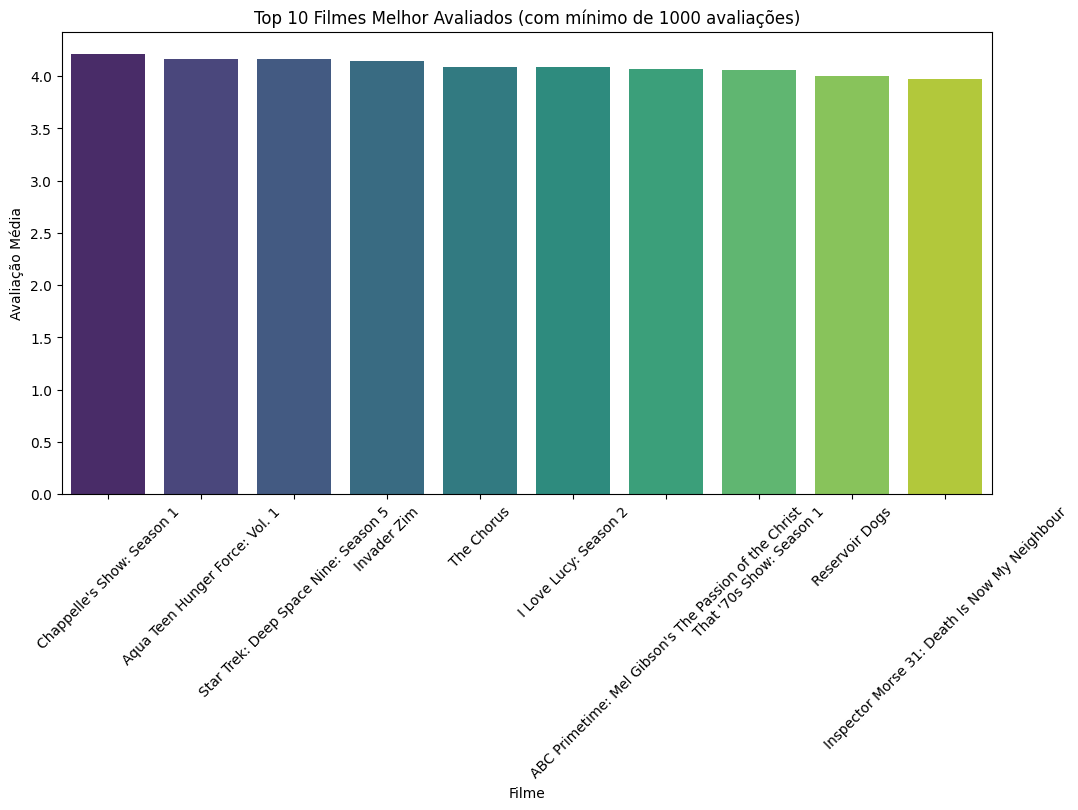

In [ ]:
# Plotando os filmes melhor avaliados
plt.figure(figsize=(12,6))
sns.barplot(x='Title', y='AverageRating', data=top_rated_movies, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Filmes Melhor Avaliados (com mínimo de 1000 avaliações)')
plt.xlabel('Filme')
plt.ylabel('Avaliação Média')
plt.show()


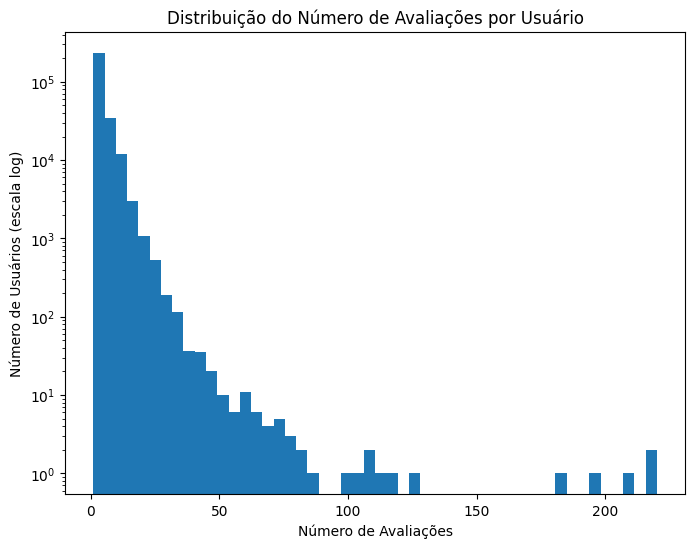

In [ ]:
# Calculando o número de avaliações por usuário
ratings_per_user = df_merged.groupby('CustomerID')['Rating'].count().reset_index()
ratings_per_user.rename(columns={'Rating': 'NumRatings'}, inplace=True)

# Distribuição do número de avaliações por usuário
plt.figure(figsize=(8,6))
plt.hist(ratings_per_user['NumRatings'], bins=50, log=True)
plt.title('Distribuição do Número de Avaliações por Usuário')
plt.xlabel('Número de Avaliações')
plt.ylabel('Número de Usuários (escala log)')
plt.show()


In [ ]:
# Usuários com mais avaliações
top_users = ratings_per_user.sort_values(by='NumRatings', ascending=False).head(10)
top_users


,CustomerID,NumRatings
32724,305344,220
41612,387418,219
261158,2439493,210
178300,1664010,196
226803,2118461,183
156752,1461435,125
175803,1639792,116
207090,1932594,113
141069,1314869,109
119521,1114324,107


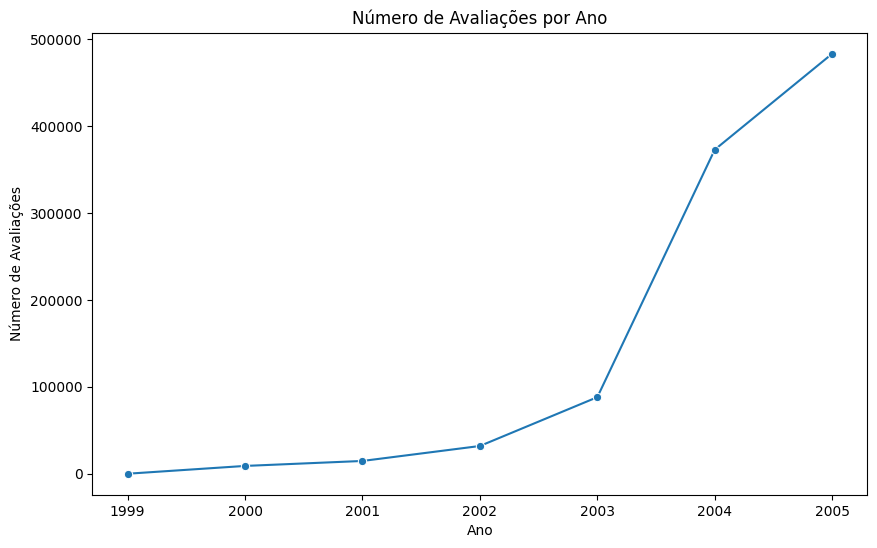

In [ ]:
# Contagem de avaliações por ano
ratings_per_year = df_merged.groupby(df_merged['Date'].dt.year)['Rating'].count().reset_index()
ratings_per_year.rename(columns={'Rating': 'NumRatings'}, inplace=True)

# Plotando o número de avaliações por ano
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='NumRatings', data=ratings_per_year, marker='o')
plt.title('Número de Avaliações por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Avaliações')
plt.show()


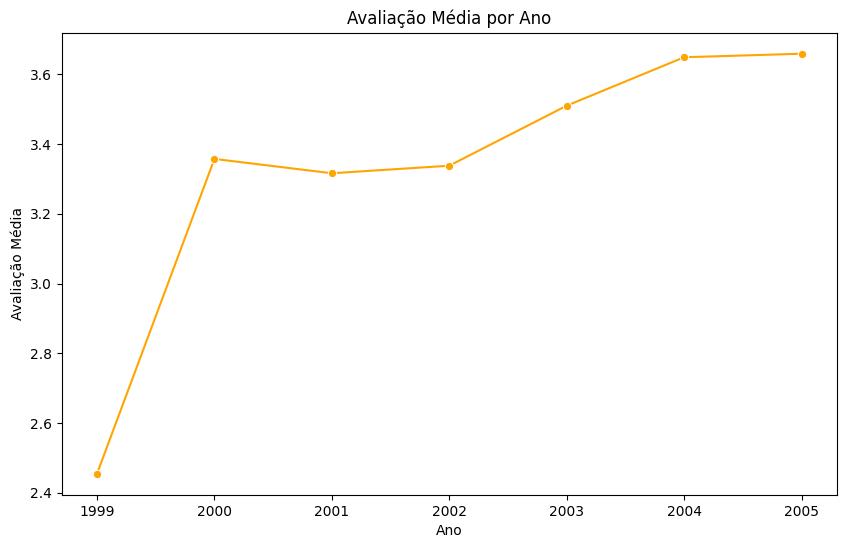

In [ ]:
# Avaliação média por ano
average_rating_per_year = df_merged.groupby(df_merged['Date'].dt.year)['Rating'].mean().reset_index()
average_rating_per_year.rename(columns={'Rating': 'AverageRating'}, inplace=True)

# Plotando a avaliação média por ano
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='AverageRating', data=average_rating_per_year, marker='o', color='orange')
plt.title('Avaliação Média por Ano')
plt.xlabel('Ano')
plt.ylabel('Avaliação Média')
plt.show()


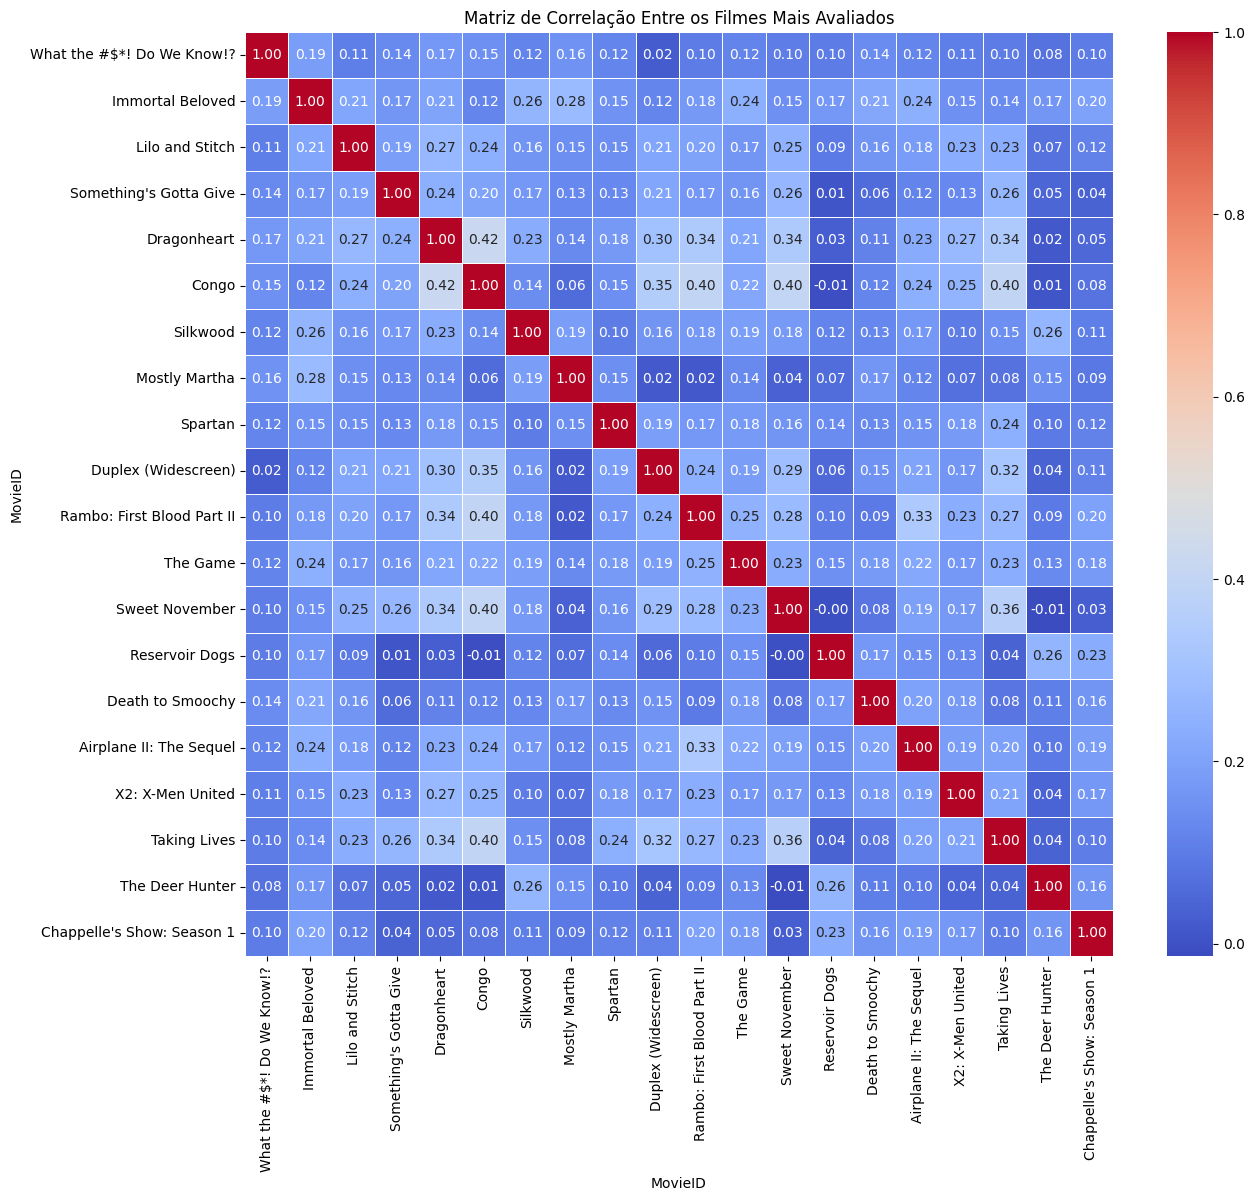

In [ ]:
# Selecionando os filmes mais avaliados
popular_movie_ids = ratings_per_movie.sort_values('NumRatings', ascending=False)['MovieID'].head(20)

# Filtrando o dataframe para esses filmes
df_popular_movies = df_merged[df_merged['MovieID'].isin(popular_movie_ids)]

# Criando a matriz usuário-filme
user_movie_matrix = df_popular_movies.pivot_table(index='CustomerID', columns='MovieID', values='Rating')

# Calculando a correlação entre os filmes
movie_corr_matrix = user_movie_matrix.corr(method='pearson', min_periods=100)

# Substituindo valores NaN por 0 (opcional)
movie_corr_matrix = movie_corr_matrix.fillna(0)

# Mapeando os MovieIDs para os títulos dos filmes
movie_titles_dict = movie_titles.set_index('MovieID')['Title'].to_dict()

# Renomeando as linhas e colunas da matriz de correlação com os títulos dos filmes
movie_corr_matrix.rename(index=movie_titles_dict, columns=movie_titles_dict, inplace=True)

# Plotando a matriz de correlação como um heatmap
plt.figure(figsize=(14,12))
sns.heatmap(movie_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação Entre os Filmes Mais Avaliados')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [ ]:

# Exibindo as primeiras linhas
movie_titles.head()


,MovieID,Year,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


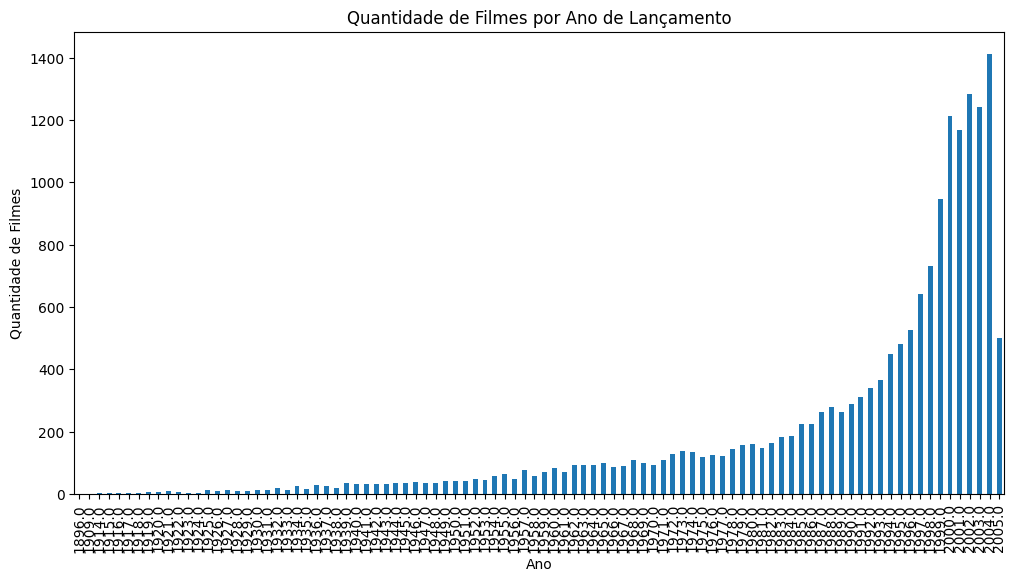

In [ ]:
# Contando a quantidade de filmes por ano de lançamento
movies_per_year = movie_titles['Year'].value_counts().sort_index()

# Plotando a quantidade de filmes por ano
plt.figure(figsize=(12,6))
movies_per_year.plot(kind='bar')
plt.title('Quantidade de Filmes por Ano de Lançamento')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.show()

In [ ]:
# Selecionando os filmes mais antigos
oldest_movies = movie_titles.sort_values(by='Year').head(10)

# Exibindo os filmes mais antigos
oldest_movies


,MovieID,Year,Title
7523,7654,1896.0,Lumiere Brothers' First Films
4884,4975,1909.0,D.W. Griffith: Years of Discovery 1909-1913
8939,9103,1914.0,Tillie's Punctured Romance
10702,10898,1914.0,Cabiria
14414,14687,1915.0,Chaplin's Essanay Comedies: Vol. 2
12907,13147,1915.0,Chaplin's Essanay Comedies: Vol. 1
8668,8821,1915.0,The Birth of a Nation
3080,3137,1915.0,Les Vampires
8838,9001,1915.0,Chaplin's Essanay Comedies: Vol. 3
15600,15896,1916.0,Chaplin Mutuals: Vol. 3


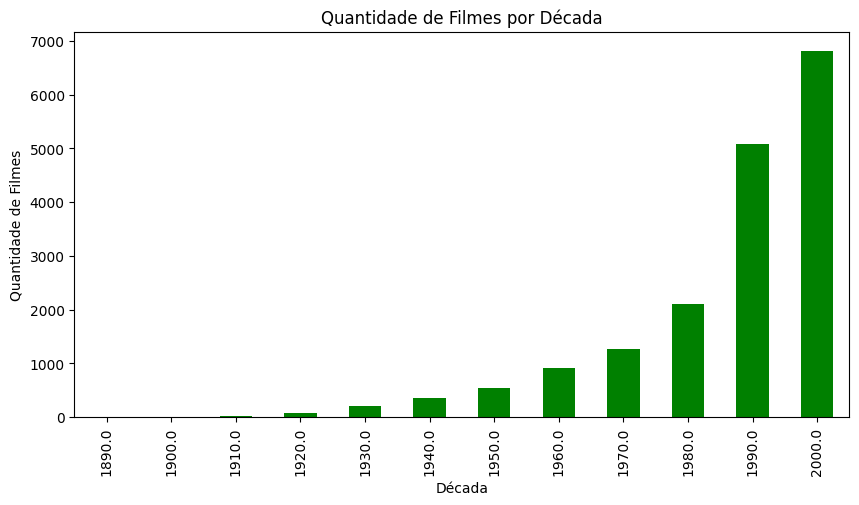

In [ ]:
# Criando uma coluna para a década
movie_titles['Decade'] = (movie_titles['Year'] // 10) * 10

# Contando a quantidade de filmes por década
movies_per_decade = movie_titles['Decade'].value_counts().sort_index()

# Plotando a quantidade de filmes por década
plt.figure(figsize=(10,5))
movies_per_decade.plot(kind='bar', color='green')
plt.title('Quantidade de Filmes por Década')
plt.xlabel('Década')
plt.ylabel('Quantidade de Filmes')
plt.show()


In [ ]:
distinct_movie_titles = movie_titles['Title'].unique()

In [ ]:
print(distinct_movie_titles)

['Dinosaur Planet' 'Isle of Man TT 2004 Review' 'Character' ... 'Epoch'
 'The Company' 'Alien Hunter']


In [ ]:
num_distinct_movie_titles = len(distinct_movie_titles)

# Exibir o número total de títulos distintos
num_distinct_movie_titles

17026

In [ ]:
import pandas as pd

# Carregando o arquivo de avaliações (combined_data_1.txt)
data_path = 'combined_data_1.txt'

# Criar um DataFrame vazio para armazenar os dados
data = {'MovieID': [], 'CustomerID': [], 'Rating': [], 'Date': []}

# Lendo o arquivo linha por linha
with open(data_path, 'r') as file:
    movie_id = None
    for line in file:
        line = line.strip()
        if line.endswith(':'):
            # Linha com o MovieID
            movie_id = int(line.replace(':', ''))
        else:
            # Linha com avaliação (CustomerID, Rating, Date)
            customer_id, rating, date = line.split(',')
            data['MovieID'].append(movie_id)
            data['CustomerID'].append(int(customer_id))
            data['Rating'].append(float(rating))
            data['Date'].append(date)

# Convertendo o dicionário para um DataFrame
df = pd.DataFrame(data)

# Exibir as primeiras linhas
df.head()


,MovieID,CustomerID,Rating,Date
0,1,1488844,3.0,2005-09-06
1,1,822109,5.0,2005-05-13
2,1,885013,4.0,2005-10-19
3,1,30878,4.0,2005-12-26
4,1,823519,3.0,2004-05-03


In [ ]:
# Definindo limites mínimos
min_ratings_per_user = 10
min_ratings_per_movie = 10

# Filtrando usuários que avaliaram menos de 10 filmes
filtered_users = df['CustomerID'].value_counts()[df['CustomerID'].value_counts() >= min_ratings_per_user].index
df = df[df['CustomerID'].isin(filtered_users)]

# Filtrando filmes que receberam menos de 10 avaliações
filtered_movies = df['MovieID'].value_counts()[df['MovieID'].value_counts() >= min_ratings_per_movie].index
df = df[df['MovieID'].isin(filtered_movies)]

# Exibindo as dimensões após o filtro
df.shape


(23446770, 4)

In [ ]:
# Carregar o arquivo probe.txt
probe_path = 'probe.txt'

# Lendo o arquivo probe
probe_data = {'MovieID': [], 'CustomerID': []}

with open(probe_path, 'r') as file:
    movie_id = None
    for line in file:
        line = line.strip()
        if line.endswith(':'):
            # Linha com o MovieID
            movie_id = int(line.replace(':', ''))
        else:
            # Linha com o CustomerID
            customer_id = int(line)
            probe_data['MovieID'].append(movie_id)
            probe_data['CustomerID'].append(customer_id)

# Convertendo para DataFrame
df_probe = pd.DataFrame(probe_data)

# Criar uma coluna que indique se os dados estão no probe
df['is_probe'] = df[['MovieID', 'CustomerID']].apply(
    lambda x: 1 if ((x['MovieID'], x['CustomerID']) in zip(df_probe['MovieID'], df_probe['CustomerID'])) else 0, axis=1)

# Dividir em treino e teste
df_train = df[df['is_probe'] == 0]
df_test = df[df['is_probe'] == 1]

# Remover a coluna auxiliar
df_train.drop(columns='is_probe', inplace=True)
df_test.drop(columns='is_probe', inplace=True)

# Verificar tamanhos dos conjuntos de treino e teste
df_train.shape, df_test.shape


KeyboardInterrupt: 

In [ ]:
# Carregar o arquivo probe.txt
probe_path = 'probe.txt'

# Lendo o arquivo probe
probe_data = {'MovieID': [], 'CustomerID': []}

with open(probe_path, 'r') as file:
    movie_id = None
    for line in file:
        line = line.strip()
        if line.endswith(':'):
            # Linha com o MovieID
            movie_id = int(line.replace(':', ''))
        else:
            # Linha com o CustomerID
            customer_id = int(line)
            probe_data['MovieID'].append(movie_id)
            probe_data['CustomerID'].append(customer_id)

# Convertendo para DataFrame
df_probe = pd.DataFrame(probe_data)

# Criar um conjunto de pares (MovieID, CustomerID) para busca rápida
probe_set = set(zip(df_probe['MovieID'], df_probe['CustomerID']))

# Criar a coluna 'is_probe' de forma eficiente
df['is_probe'] = df[['MovieID', 'CustomerID']].apply(lambda x: 1 if (x['MovieID'], x['CustomerID']) in probe_set else 0, axis=1)

# Dividir em treino e teste
df_train = df[df['is_probe'] == 0]
df_test = df[df['is_probe'] == 1]

# Remover a coluna auxiliar
df_train.drop(columns='is_probe', inplace=True)
df_test.drop(columns='is_probe', inplace=True)

# Verificar tamanhos dos conjuntos de treino e teste
df_train.shape, df_test.shape


<ipython-input-14-86b93674689d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns='is_probe', inplace=True)
<ipython-input-14-86b93674689d>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns='is_probe', inplace=True)


((968858, 4), (30919, 4))

In [ ]:
!pip install scikit-surprise
import sys
!{sys.executable} -m pip install scikit-surprise

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

# Configurar os dados para a biblioteca Surprise
reader = Reader(rating_scale=(1, 5))

# Preparar o conjunto de treino para Surprise
train_data = Dataset.load_from_df(df_train[['CustomerID', 'MovieID', 'Rating']], reader)

# Preparar o conjunto de teste para Surprise
test_data = list(zip(df_test['CustomerID'], df_test['MovieID'], df_test['Rating']))

# Carregar o conjunto de treino
trainset = train_data.build_full_trainset()

# Inicializar o modelo SVD
model = SVD()

# Treinar o modelo
model.fit(trainset)

# Fazer previsões para o conjunto de teste
predictions = model.test(test_data)

# Avaliar o desempenho do modelo com RMSE
accuracy.rmse(predictions)



RMSE: 1.0565


1.0564999829585835